In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a9ab1b9d23ce1f4f0e590ea8c68b899b


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | bukama
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | cabo san lucas
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | saint-francois
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | ust-kut
Processing Record 14 of Set 1 | fiche
Processing Record 15 of Set 1 | esperance
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | saldanha
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | maningrida
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | port lincoln
Processing Record 22 of Set 1 | qaanaaq
Processing Record 23 of

Processing Record 40 of Set 4 | tezu
Processing Record 41 of Set 4 | aasiaat
Processing Record 42 of Set 4 | kamloops
Processing Record 43 of Set 4 | san cristobal
Processing Record 44 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 45 of Set 4 | sangar
Processing Record 46 of Set 4 | port macquarie
Processing Record 47 of Set 4 | turukhansk
Processing Record 48 of Set 4 | iracoubo
Processing Record 49 of Set 4 | santo antonio do ica
Processing Record 50 of Set 4 | urdzhar
City not found. Skipping...
Processing Record 1 of Set 5 | sioux lookout
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | kilrush
Processing Record 4 of Set 5 | nicoya
Processing Record 5 of Set 5 | clonakilty
Processing Record 6 of Set 5 | jining
Processing Record 7 of Set 5 | ryotsu
Processing Record 8 of Set 5 | shache
Processing Record 9 of Set 5 | kahului
Processing Record 10 of Set 5 | olafsvik
Processing Record 11 of Set 5 | tapa
Processing Record 12 of Set 5 | t

City not found. Skipping...
Processing Record 27 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 28 of Set 8 | buin
Processing Record 29 of Set 8 | mar del plata
Processing Record 30 of Set 8 | aquiraz
Processing Record 31 of Set 8 | syracuse
Processing Record 32 of Set 8 | san patricio
Processing Record 33 of Set 8 | kruisfontein
Processing Record 34 of Set 8 | flin flon
Processing Record 35 of Set 8 | ilka
City not found. Skipping...
Processing Record 36 of Set 8 | hamilton
Processing Record 37 of Set 8 | rawson
Processing Record 38 of Set 8 | vayalar
Processing Record 39 of Set 8 | miri
Processing Record 40 of Set 8 | vallenar
Processing Record 41 of Set 8 | kirs
Processing Record 42 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 43 of Set 8 | charlottesville
Processing Record 44 of Set 8 | mattru
Processing Record 45 of Set 8 | torbay
Processing Record 46 of Set 8 | kirakira
Processing Record 47 of Set 8 | misratah
Processing Record 48 of 

Processing Record 13 of Set 12 | pasighat
Processing Record 14 of Set 12 | caravelas
Processing Record 15 of Set 12 | kendari
Processing Record 16 of Set 12 | lincoln
Processing Record 17 of Set 12 | khormuj
City not found. Skipping...
Processing Record 18 of Set 12 | serowe
Processing Record 19 of Set 12 | yangambi
Processing Record 20 of Set 12 | soyo
Processing Record 21 of Set 12 | lima
Processing Record 22 of Set 12 | biloela
Processing Record 23 of Set 12 | biltine
Processing Record 24 of Set 12 | montana
Processing Record 25 of Set 12 | dubbo
Processing Record 26 of Set 12 | aleksandrovskoye
Processing Record 27 of Set 12 | porto murtinho
Processing Record 28 of Set 12 | neiafu
Processing Record 29 of Set 12 | san carlos de bariloche
Processing Record 30 of Set 12 | jeremie
Processing Record 31 of Set 12 | poum
Processing Record 32 of Set 12 | cap malheureux
Processing Record 33 of Set 12 | huarmey
Processing Record 34 of Set 12 | toulepleu
City not found. Skipping...
Processing

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.10,-79.24,82.40,61,20,3.36,US,2020-07-09 15:50:09
1,Yerbogachen,61.28,108.01,53.53,91,54,2.89,RU,2020-07-09 15:49:05
2,Kapaa,22.08,-159.32,77.00,83,75,13.87,US,2020-07-09 15:50:06
3,Bukama,-9.20,25.85,85.37,23,0,3.80,CD,2020-07-09 15:52:48
4,Bredasdorp,-34.53,20.04,55.40,87,100,17.22,ZA,2020-07-09 15:50:28
5,Cabo San Lucas,22.89,-109.91,86.00,74,20,10.29,MX,2020-07-09 15:50:05
6,Mataura,-46.19,168.86,42.87,92,94,5.61,NZ,2020-07-09 15:50:06
7,Severo-Kurilsk,50.68,156.12,48.69,94,100,16.58,RU,2020-07-09 15:50:34
8,Cidreira,-30.18,-50.21,55.54,62,0,19.42,BR,2020-07-09 15:50:26
9,Cape Town,-33.93,18.42,55.00,93,75,16.11,ZA,2020-07-09 15:46:49


In [11]:
#Creating new column order
#City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed,
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2020-07-09 15:50:09,42.10,-79.24,82.40,61,20,3.36
1,Yerbogachen,RU,2020-07-09 15:49:05,61.28,108.01,53.53,91,54,2.89
2,Kapaa,US,2020-07-09 15:50:06,22.08,-159.32,77.00,83,75,13.87
3,Bukama,CD,2020-07-09 15:52:48,-9.20,25.85,85.37,23,0,3.80
4,Bredasdorp,ZA,2020-07-09 15:50:28,-34.53,20.04,55.40,87,100,17.22
...,...,...,...,...,...,...,...,...,...
543,Yulara,AU,2020-07-09 15:51:20,-25.24,130.99,46.40,31,19,3.31
544,Lata,PT,2020-07-09 15:50:53,40.16,-8.33,86.00,48,0,10.31
545,Kenai,US,2020-07-09 15:54:14,60.55,-151.26,55.00,93,90,3.04
546,Chicama,PE,2020-07-09 15:51:02,-7.84,-79.15,70.84,57,88,9.53


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594310138.5506308

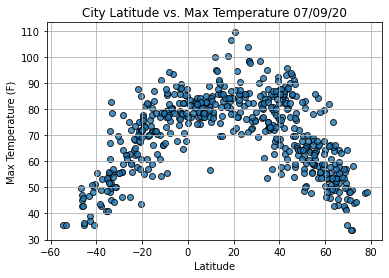

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

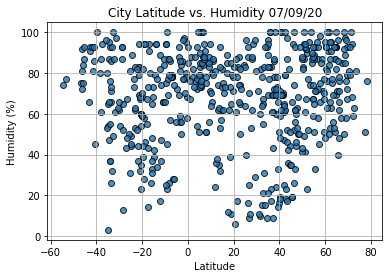

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

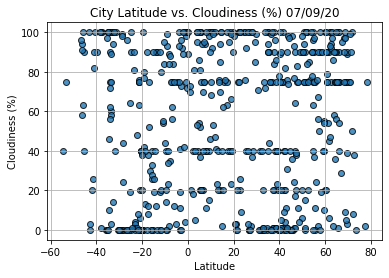

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

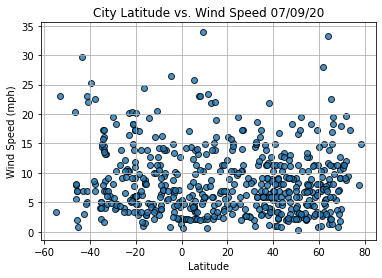

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()